## Importing Library

# The Core Idea

Use the streamlit to collect tweets related to disasters or emergencies.

Utilize the Sentiment140 dataset to train a sentiment classifier (positive/negative).

Build a classifier that can distinguish between serious/urgent tweets requesting help and general/positive tweets.

Apply the classifier to score and rank tweets based on urgency or severity.

Top-ranked tweets will be those actively asking for help or highlighting critical situations, which can then be used to organize resources and assess the current state of the emergency.

# Data Exploration and Visualization

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib


In [90]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [91]:
df.info() #no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [92]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [93]:
df = df[['text', 'target']]
df['target'].value_counts()


target
0    4342
1    3271
Name: count, dtype: int64

In [94]:
df.duplicated().sum()

np.int64(92)

In [95]:
df = df.drop_duplicates()

In [96]:
df.duplicated().sum()


np.int64(0)

In [97]:
df['target'].value_counts()


target
0    4315
1    3206
Name: count, dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7521 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7521 non-null   object
 1   target  7521 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 176.3+ KB


In [99]:
df.head(5)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7521 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7521 non-null   object
 1   target  7521 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 176.3+ KB


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7521 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7521 non-null   object
 1   target  7521 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 176.3+ KB


In [102]:
df.text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [103]:
df['text'][678]

'Bright &amp; BLAZING Fireman Birthday Party http://t.co/9rFo9GY3nE #Weddings'

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df = df.drop_duplicates()

In [106]:
df = df.drop_duplicates()

In [107]:
df['text_length_words'] = df['text'].apply(lambda x: len(str(x).split()))


In [108]:
df[['text', 'text_length_words']].head()


,text,text_length_words
0,Our Deeds are the Reason of this #earthquake M...,13
1,Forest fire near La Ronge Sask. Canada,7
2,All residents asked to 'shelter in place' are ...,22
3,"13,000 people receive #wildfires evacuation or...",8
4,Just got sent this photo from Ruby #Alaska as ...,16


In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
df = df.drop_duplicates()

In [111]:
df.duplicated().sum()

np.int64(0)

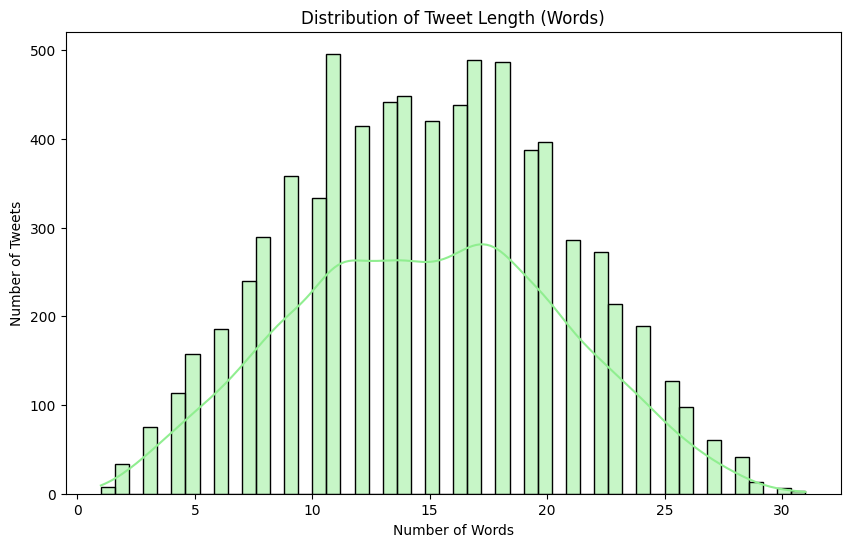

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['text_length_words'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Tweet Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.show()


In [113]:
import plotly.express as px


fig = px.histogram(
    df,
    x='text_length_words',
    nbins=50,
    title='Distribution of Tweet Length (Words)',
    labels={'text_length_words':'Number of Words'},
    marginal='box',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Number of Words',
    yaxis_title='Number of Tweets',
    bargap=0.1
)

fig.show()


In [114]:
(df['text_length_words']>37).sum()


np.int64(0)

In [115]:
import plotly.express as px


fig = px.pie(
    df,
    names='target',
    title='Label Distribution',
    color='target',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_traces(
    textinfo='percent+label',
    pull=[0.05 if i==0 else 0 for i in range(len(df['target'].unique()))]  )

fig.show()


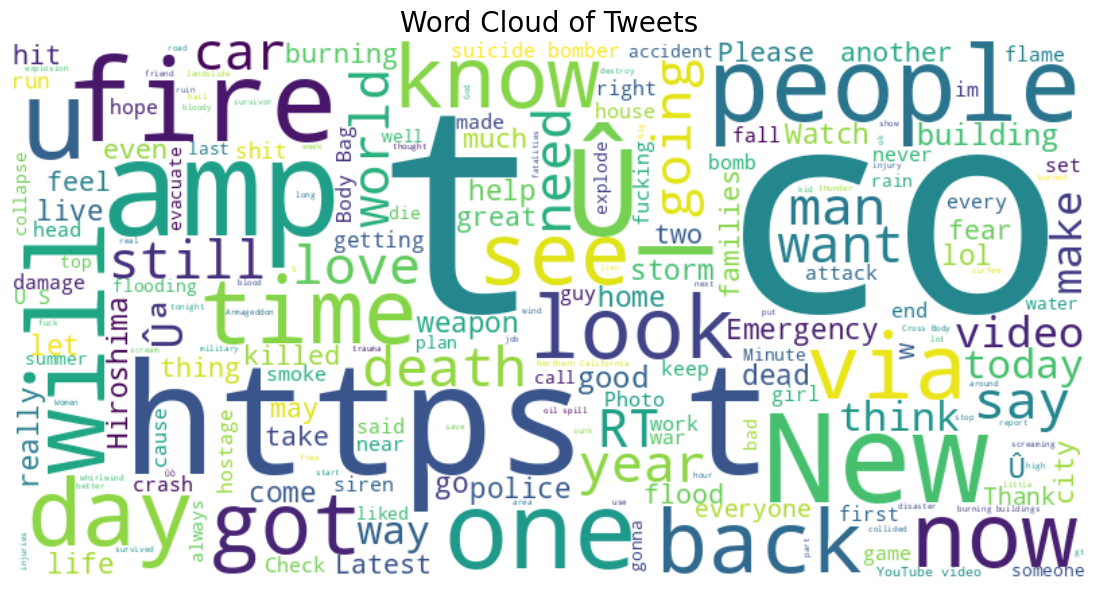

In [116]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

all_text = ' '.join(df['text'].astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    colormap='viridis'
).generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets', fontsize=20)
plt.show()


# Data Preprocessing

In [117]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

try:
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    print("✅ NLTK resources already available")
except:
    print("❌ NLTK resources not available")


✅ NLTK resources already available


In [118]:
# ===== L====
import pandas as pd

df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

# Keep only required columns
df = df[['text', 'target']]

# Remove duplicates
df.drop_duplicates(inplace=True)

# Basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7521 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7521 non-null   object
 1   target  7521 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 176.3+ KB


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [119]:

print("Missing values per column:")
print(df.isnull().sum())


df.dropna(subset=['text'], inplace=True)


Missing values per column:
text      0
target    0
dtype: int64


In [120]:
def clean_text(text):
    text = text.lower()

    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)


    text = re.sub(r"(http[s]?://\S+|www\.\S+)", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)


    text = re.sub(r"\s+", " ", text).strip()

    return text


df['text'] = df['text'].apply(clean_text)


In [121]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['text'] = df['text'].apply(remove_stopwords)



In [122]:

df['tokens'] = df['text'].apply(word_tokenize)
df.head(5)


,text,target,tokens
0,deeds reason earthquake may allah forgive us,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,residents asked ishelter place notified office...,1,"[residents, asked, ishelter, place, notified, ..."
3,13000 people receive wildfires evacuation orde...,1,"[13000, people, receive, wildfires, evacuation..."
4,got sent photo ruby alaska smoke wildfires pou...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [123]:
df['tokens_lemmatized'] = df['tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word, pos='v') for word in x]
)
df.head(5)



,text,target,tokens,tokens_lemmatized
0,deeds reason earthquake may allah forgive us,1,"[deeds, reason, earthquake, may, allah, forgiv...","[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,residents asked ishelter place notified office...,1,"[residents, asked, ishelter, place, notified, ...","[residents, ask, ishelter, place, notify, offi..."
3,13000 people receive wildfires evacuation orde...,1,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,got sent photo ruby alaska smoke wildfires pou...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[get, send, photo, ruby, alaska, smoke, wildfi..."


In [124]:

df['text_length_words'] = df['tokens_lemmatized'].apply(len)


Q1 = df['text_length_words'].quantile(0.25)
Q3 = df['text_length_words'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['text_length_words'] >= lower_bound) &
        (df['text_length_words'] <= upper_bound)]

print("After outlier removal, dataset shape:", df.shape)


After outlier removal, dataset shape: (7516, 5)


# Feature Engineering

*Feature Creation*

In [125]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler


In [126]:

df['doc_length_words'] = df['tokens_lemmatized'].apply(len)


df['avg_word_length'] = df['tokens_lemmatized'].apply(lambda x: np.mean([len(word) for word in x]) if len(x)>0 else 0)


df['punctuation_count'] = df['text'].apply(lambda x: sum([1 for c in x if c in '.,!?;:']))


df['capital_count'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))


df['digit_count'] = df['text'].apply(lambda x: sum(1 for c in x if c.isdigit()))


df[['text', 'doc_length_words', 'avg_word_length', 'punctuation_count', 'capital_count', 'digit_count']].head()


,text,doc_length_words,avg_word_length,punctuation_count,capital_count,digit_count
0,deeds reason earthquake may allah forgive us,7,5.428571,0,0,0
1,forest fire near la ronge sask canada,7,4.428571,0,0,0
2,residents asked ishelter place notified office...,11,6.454545,0,0,0
3,13000 people receive wildfires evacuation orde...,7,7.428571,0,0,5
4,got sent photo ruby alaska smoke wildfires pou...,9,5.111111,0,0,0


In [127]:

df['clean_text_joined'] = df['tokens_lemmatized'].apply(lambda x: ' '.join(x))


bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['clean_text_joined'])

print("BoW shape:", X_bow.shape)


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text_joined'])

print("TF-IDF shape:", X_tfidf.shape)


BoW shape: (7516, 5000)
TF-IDF shape: (7516, 5000)


In [128]:

tfidf_bigram = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf_bigram = tfidf_bigram.fit_transform(df['clean_text_joined'])

print("TF-IDF with bigrams shape:", X_tfidf_bigram.shape)


TF-IDF with bigrams shape: (7516, 5000)


In [129]:
scaler = StandardScaler()

numerical_features = ['doc_length_words', 'avg_word_length', 'punctuation_count', 'capital_count', 'digit_count']

df_scaled = scaler.fit_transform(df[numerical_features])

df_scaled[:5]


array([[-0.52366444, -0.22724164,  0.        ,  0.        , -0.35949166],
       [-0.52366444, -1.10192798,  0.        ,  0.        , -0.35949166],
       [ 0.56404094,  0.67016382,  0.        ,  0.        , -0.35949166],
       [-0.52366444,  1.52213102,  0.        ,  0.        ,  1.65177774],
       [ 0.02018825, -0.50491984,  0.        ,  0.        , -0.35949166]])

# Model_selection traninig

In [130]:
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [131]:
# Target variable
y = df['target']

# For simplicity: use TF-IDF features from Task 3
X = X_tfidf  # TF-IDF sparse matrix

# Train/Test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (6012, 5000)
Testing shape: (1504, 5000)


In [132]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.7952127659574468
Precision: 0.8147448015122873
Recall: 0.672386895475819
F1 Score: 0.7367521367521368
Confusion Matrix:
 [[765  98]
 [210 431]]


In [133]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("=== Multinomial Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))


=== Multinomial Naive Bayes ===
Accuracy: 0.8025265957446809
Precision: 0.8220973782771536
Recall: 0.6848673946957878
F1 Score: 0.7472340425531915
Confusion Matrix:
 [[768  95]
 [202 439]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       863
           1       0.82      0.68      0.75       641

    accuracy                           0.80      1504
   macro avg       0.81      0.79      0.79      1504
weighted avg       0.80      0.80      0.80      1504



In [134]:
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("=== Linear SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


=== Linear SVM ===
Accuracy: 0.7912234042553191
Precision: 0.7729549248747913
Recall: 0.7223088923556942
F1 Score: 0.7467741935483871
Confusion Matrix:
 [[727 136]
 [178 463]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       863
           1       0.77      0.72      0.75       641

    accuracy                           0.79      1504
   macro avg       0.79      0.78      0.78      1504
weighted avg       0.79      0.79      0.79      1504



## Hyperparameter tuning

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [136]:
# Target variable
y = df['target']

# Features: TF-IDF matrix (from Task 3)
X = X_tfidf   # sparse matrix

# Train / Test split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check shapes
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training shape: (6012, 5000)
Testing shape: (1504, 5000)
Training labels shape: (6012,)
Testing labels shape: (1504,)


In [137]:
# Hyperparameter tuning for Logistic Regression
lr = LogisticRegression(max_iter=1000)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

print("Best Logistic Regression Parameters:", grid_lr.best_params_)


Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [138]:
# Hyperparameter tuning for Multinomial Naive Bayes
nb = MultinomialNB()

param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0]
}

grid_nb = GridSearchCV(
    estimator=nb,
    param_grid=param_grid_nb,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)

best_nb = grid_nb.best_estimator_

print("Best Naive Bayes Parameters:", grid_nb.best_params_)


Best Naive Bayes Parameters: {'alpha': 0.5}


In [139]:
# Hyperparameter tuning for Linear SVM
svm = LinearSVC(random_state=42, max_iter=5000)

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_

print("Best SVM Parameters:", grid_svm.best_params_)


Best SVM Parameters: {'C': 0.1}


# Model Evaluation and Analysis

In [140]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import pandas as pd

models_preds = {
    "Logistic Regression": y_pred_lr,
    "Multinomial Naive Bayes": y_pred_nb,
    "Linear SVM": y_pred_svm
}

results = []

for model_name, y_pred in models_preds.items():

    print(f"\n# {model_name}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # store metrics
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# ===== Comparison Table =====
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
display(results_df)

# ===== Auto-select Best Model =====
best_model_row = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]
best_model_name = best_model_row["Model"]

print("\n✅ Best Model Automatically Selected:", best_model_name)




# Logistic Regression
Confusion Matrix:
 [[765  98]
 [210 431]]

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       863
           1       0.81      0.67      0.74       641

    accuracy                           0.80      1504
   macro avg       0.80      0.78      0.78      1504
weighted avg       0.80      0.80      0.79      1504


# Multinomial Naive Bayes
Confusion Matrix:
 [[768  95]
 [202 439]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       863
           1       0.82      0.68      0.75       641

    accuracy                           0.80      1504
   macro avg       0.81      0.79      0.79      1504
weighted avg       0.80      0.80      0.80      1504


# Linear SVM
Confusion Matrix:
 [[727 136]
 [178 463]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80   

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.795213,0.814745,0.672387,0.736752
1,Multinomial Naive Bayes,0.802527,0.822097,0.684867,0.747234
2,Linear SVM,0.791223,0.772955,0.722309,0.746774



✅ Best Model Automatically Selected: Multinomial Naive Bayes


In [141]:
# ===============================
# Select Final Model Object
# ===============================

if best_model_name == "Logistic Regression":
    final_model = best_lr
elif best_model_name == "Multinomial Naive Bayes":
    final_model = best_nb
elif best_model_name == "Linear SVM":
    final_model = best_svm

print("✅ Final model selected:")
print(final_model)


✅ Final model selected:
MultinomialNB(alpha=0.5)


In [142]:
import joblib

joblib.dump(final_model, "final_sentiment_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

# volum

In [145]:
# ===== TEXT PREPROCESSING FUNCTION =====
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r"(http\S+|www\S+)", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    words = text.split()
    words = [w for w in words if w not in stop_words]

    return " ".join(words)


In [146]:
# Sample unseen tweets (future / new data)
new_tweets = [
    "There is a massive fire in the city center",
    "I am so happy today!",
    "Earthquake destroyed several buildings",
    "Enjoying my vacation at the beach"
]

# Create DataFrame
new_df = pd.DataFrame({"text": new_tweets})

# Apply same preprocessing
new_df['clean_text'] = new_df['text'].apply(preprocess)

# Vectorize
X_new = tfidf_vectorizer.transform(new_df['clean_text'])

# Predict
new_df['prediction'] = final_model.predict(X_new)

# Map labels
new_df['prediction_label'] = new_df['prediction'].map({
    1: "Disaster",
    0: "Not Disaster"
})

new_df


,text,clean_text,prediction,prediction_label
0,There is a massive fire in the city center,massive fire city center,1,Disaster
1,I am so happy today!,happy today,0,Not Disaster
2,Earthquake destroyed several buildings,earthquake destroyed several buildings,1,Disaster
3,Enjoying my vacation at the beach,enjoying vacation beach,0,Not Disaster


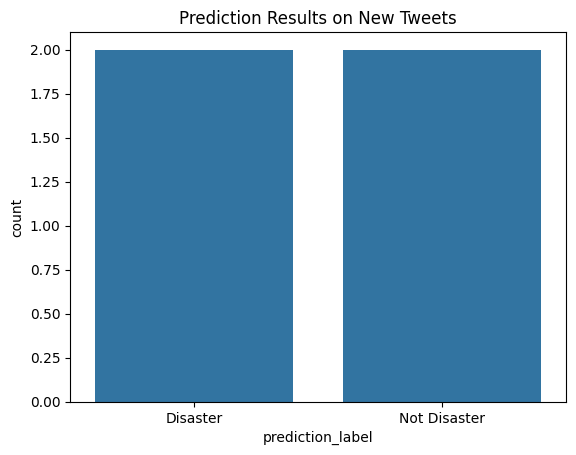

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='prediction_label', data=new_df)
plt.title("Prediction Results on New Tweets")
plt.show()


In [148]:
# ===== KEYWORD-BASED URGENCY SCORING =====

# Define disaster-related keywords
disaster_keywords = [
    "help", "emergency", "urgent", "fire", "flood",
    "earthquake", "rescue", "trapped", "injured",
    "danger", "collapse", "dead", "dying", "hospital"
]

# Function to calculate urgency score
def keyword_score(text):
    text = text.lower()
    return sum(1 for word in disaster_keywords if word in text)

# Apply keyword scoring
new_df['keyword_score'] = new_df['clean_text'].apply(keyword_score)

# Combine ML prediction + keyword score
new_df['urgency_score'] = new_df['keyword_score'] + new_df['prediction']

# Rank tweets by urgency
ranked_tweets = new_df.sort_values(by='urgency_score', ascending=False)

ranked_tweets


,text,clean_text,prediction,prediction_label,keyword_score,urgency_score
0,There is a massive fire in the city center,massive fire city center,1,Disaster,1,2
2,Earthquake destroyed several buildings,earthquake destroyed several buildings,1,Disaster,1,2
1,I am so happy today!,happy today,0,Not Disaster,0,0
3,Enjoying my vacation at the beach,enjoying vacation beach,0,Not Disaster,0,0


<Axes: xlabel='urgency_score', ylabel='text'>

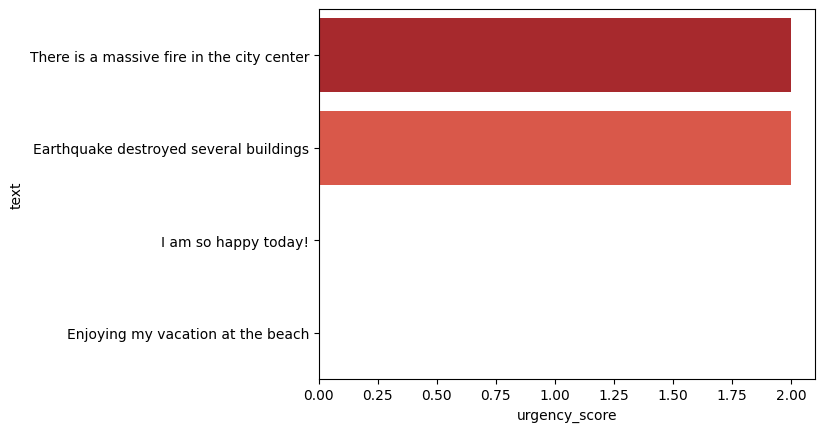

In [150]:
sns.barplot(
    x='urgency_score',
    y='text',
    hue='text',
    data=ranked_tweets,
    palette='Reds_r',
    legend=False
)
